In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
df = pd.read_csv('G:\My Drive\Coding\Personal Projects\sentiment-analysis-tool\my_module\Amazon_Unlocked_Mobile.csv')

In [3]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
df['Product Name'].value_counts()

Product Name
Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP Camera, White (Certified Refurbished)                                    1451
Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera - Unlocked - Black (Certified Refurbished)                                 1241
BLU Studio 5.0 C HD Unlocked Cellphone, Black                                                                           1194
OtterBox Iphone 5/5S/SE Defender Case w/ Drop and Dust Proctection - Realtree AP Pink                                   1129
Motorola Moto E (1st Generation) - Black - 4 GB - Global GSM Unlocked Phone                                             1127
                                                                                                                        ... 
Samsung Galaxy express Prime Unlocked 4G LTE J320A 16GB Quad Core LCD 5" Android 6.0 Desbloqueado                          1
Samsung Galaxy J1 Ace J111M 8GB Unlocked GSM Quad-Core Android LolliPop Smartphone - Black (International Versio

In [5]:
#Task1
class SentimentAnalysis:
    @staticmethod
    def sentiment_analyzer(text):
        blob = TextBlob(text)
        score = blob.sentiment.polarity

        if score < -0.2:
            return 'Negative'
        elif score > 0.2:
            return 'Positive'
        else:
            return 'Neutral'

In [6]:
#Task2
test_data = ['happy', 'exciting', 'good', 'rich', 'smile', 'sad', 'disappointed', 'bad', 'poor', 'anger', 'food', 'animal']

for x in test_data:
    print(x, SentimentAnalysis.sentiment_analyzer(x))


happy Positive
exciting Positive
good Positive
rich Positive
smile Positive
sad Negative
disappointed Negative
bad Negative
poor Negative
anger Negative
food Neutral
animal Neutral


In [7]:
#Task3
filtered_df = df[df['Product Name'] == 'BLU Studio 5.0 C HD Unlocked Cellphone, Black']

if len(filtered_df) < 1000:
    raise ValueError("Selected product does not have at least 1000 reviews.")

product_name = 'BLU Studio 5.0 C HD Unlocked Cellphone, Black'
num_rows = len(filtered_df)
num_columns = filtered_df.shape[1]

review_lengths = filtered_df['Product Name'].str.len()
shortest_review_length = review_lengths.min()
longest_review_length = review_lengths.max()
average_review_length = review_lengths.mean()

print(f"Product Name: {product_name}")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")
print(f"Length of Shortest Review: {shortest_review_length}")
print(f"Length of Longest Review: {longest_review_length}")
print(f"Average Length of Review: {average_review_length:.2f}")


Product Name: BLU Studio 5.0 C HD Unlocked Cellphone, Black
Number of Rows: 1194
Number of Columns: 6
Length of Shortest Review: 45
Length of Longest Review: 45
Average Length of Review: 45.00


In [8]:
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,5,I absolutely love this phone! My only problem ...,0.0
1,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,5,This phone is absolutely fantastic for the pri...,0.0
2,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,4,I bought this phone for my wife as a birthday ...,0.0
3,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,4,I have been using this phone for several month...,2.0
4,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,2,"The phone came in excellent condition , but it...",0.0
...,...,...,...,...,...,...
1189,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,5,"Good cell phone, it is nice, thanks",0.0
1190,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,4,great value,0.0
1191,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,5,Nothing to say other than : go for it.The scre...,NaN
1192,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,1,This phone sucks and It wnt let me use it with...,2.0


In [9]:
#Task4
filtered_df['Sentiment'] = filtered_df['Reviews'].apply(SentimentAnalysis.sentiment_analyzer)


In [10]:
filtered_df['Sentiment'].value_counts()

Sentiment
Positive    754
Neutral     408
Negative     32
Name: count, dtype: int64

In [11]:
filtered_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
0,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,5,I absolutely love this phone! My only problem ...,0.0,Positive
1,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,5,This phone is absolutely fantastic for the pri...,0.0,Neutral
2,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,4,I bought this phone for my wife as a birthday ...,0.0,Positive
3,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,4,I have been using this phone for several month...,2.0,Positive
4,"BLU Studio 5.0 C HD Unlocked Cellphone, Black",BLU,173.44,2,"The phone came in excellent condition , but it...",0.0,Positive


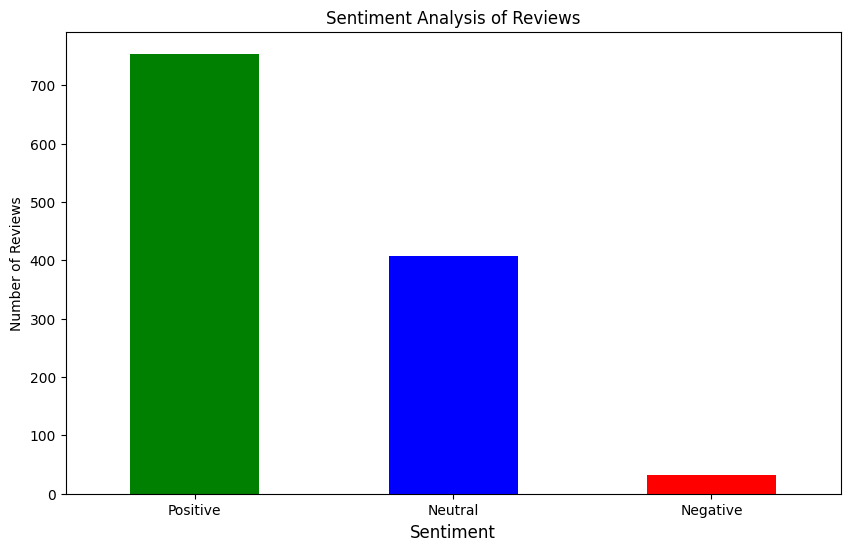

In [12]:
#Task5, A
sentiment_counts = filtered_df['Sentiment'].value_counts()

plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

In [13]:
#Task5, B
for sentiment in ['Positive', 'Neutral', 'Negative']:
    example = filtered_df[filtered_df['Sentiment'] == sentiment].iloc[0]
    print(f"Sentiment: {sentiment}")
    print(f"Review: {example['Reviews']}")
    print(f"Polarity: {TextBlob(example['Reviews']).sentiment.polarity}\n")


Sentiment: Positive
Review: I absolutely love this phone! My only problem is I can't receive picture messaging..
Polarity: 0.3125

Sentiment: Neutral
Review: This phone is absolutely fantastic for the price. I will never own another expensive name brand Android again... The processor is quick and not laggy for regular uses. I don't game or use graphic intense apps on my phone so i cannot attest to its performance there.
Polarity: -0.03333333333333333

Sentiment: Negative
Review: I buy two phones, a few days one of her horn damaged handset, and could make the refund through amazon (for that I thank you), but a month will damage the horn to the other, so I think that the phones have a serious problem with atrial horn.
Polarity: -0.21944444444444444



In [14]:
#Task5, C
negative_reviews = filtered_df[filtered_df['Sentiment'] == "Negative"]
pd.set_option('display.max_colwidth', None)  
print(negative_reviews['Reviews'])




28                                                                                                                                                                                                                                                                                                                                                                                  I buy two phones, a few days one of her horn damaged handset, and could make the refund through amazon (for that I thank you), but a month will damage the horn to the other, so I think that the phones have a serious problem with atrial horn.
69                                                                                                                                                                                                                                                  The phone had battery issue in just 3 months. The phone can not be charged at all and the phone can not be turned on. The phone has been sent 

In [15]:
#Task5, D
for sentiment in ['Positive', 'Neutral', 'Negative']:
    misclassified = filtered_df[(filtered_df['Sentiment'] == sentiment) & ((filtered_df['Rating'] < 3) & (sentiment == 'Positive') | (filtered_df['Rating'] > 3) & (sentiment == 'Negative'))]
    if not misclassified.empty:
        example = misclassified.iloc[0]
        print(f"Potential Misclassification for {sentiment} Sentiment")
        print(f"Review: {example['Reviews']}")
        print(f"Rating: {example['Rating']}")
        print(f"Polarity: {TextBlob(example['Reviews']).sentiment.polarity}\n")


Potential Misclassification for Positive Sentiment
Review: The phone came in excellent condition , but it turned battery damaged me
Rating: 2
Polarity: 1.0

Potential Misclassification for Negative Sentiment
Review: My dad loves this phone. No issues at all. Why spend $700 on a phone? It's completely unnecessary.
Rating: 5
Polarity: -0.4



In [16]:
#Task6
filtered_df.to_csv('filterd_data_frame.csv', index=False)
